#**Color Extraction**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
cd /content/gdrive/MyDrive/RV_Project/extracted_picsFirst54

/content/gdrive/.shortcut-targets-by-id/1n64G5Yfy2tMmSUsDIxfpds0UVIg0bU3E/RV_Project/extracted_picsFirst54


In [3]:
# !pip install easydev            
# !pip install colormap       
# !pip install opencv-python           
# !pip install colorgram.py 
# !pip install extcolors  

In [4]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import extcolors

from colormap import rgb2hex

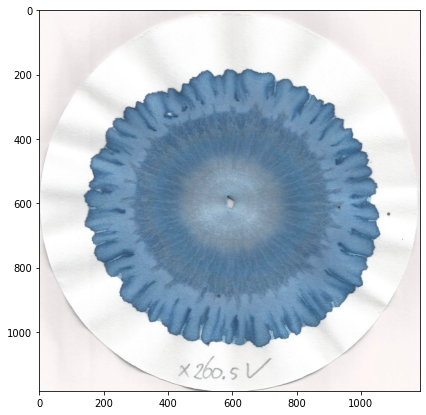

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (10,7))
image_name = '1910008.png'
chromotogram = cv2.imread(image_name)
plt.imshow(chromotogram)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  


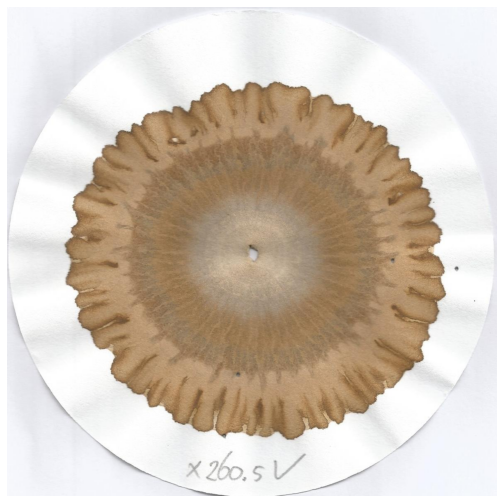

In [6]:
input_name = image_name
output_width = 900                   #set the output size
img = Image.open("/content/1910008.png")
wpercent = (output_width/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((output_width,hsize), Image.ANTIALIAS)

#save
resize_name = 'resize_' + input_name  #the resized image name
img.save(resize_name)                 #output location can be specified before resize_name

#read
plt.figure(figsize=(9, 9))
img_url = resize_name
img = plt.imread(img_url)
plt.imshow(img)
plt.axis('off')
plt.show()

In [7]:
colors_x = extcolors.extract_from_path(img_url, tolerance = 12, limit = 12)
colors_x

([((255, 255, 255), 449508),
  ((156, 124, 86), 284001),
  ((188, 156, 118), 46144),
  ((167, 149, 129), 12513),
  ((220, 220, 220), 7961),
  ((129, 94, 54), 2957),
  ((201, 181, 154), 2464),
  ((126, 103, 80), 2001),
  ((182, 182, 182), 1893),
  ((140, 140, 140), 412),
  ((79, 59, 38), 66),
  ((109, 109, 109), 38)],
 810000)

In [8]:
colors_x[0][1][0]

(156, 124, 86)

In [9]:
h = colors_x[0][1][0][0]
s = colors_x[0][1][0][1]
v = colors_x[0][1][0][2]
print(h,s,v)

156 124 86


In [10]:

def color_to_df(input):
    colors_pre_list = str(input).replace('([(','').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]
    
    #convert RGB to HEX code
    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(","")),
                          int(i.split(", ")[1]),
                          int(i.split(", ")[2].replace(")",""))) for i in df_rgb]
    
    df = pd.DataFrame(zip(df_color_up, df_percent), columns = ['c_code','occurence'])
    return df

df_color = color_to_df(colors_x)
df_color = df_color[1:]
df_color

c_code occurence
1   #9C7C56    284001
2   #BC9C76     46144
3   #A79581     12513
4   #DCDCDC      7961
5   #815E36      2957
6   #C9B59A      2464
7   #7E6750      2001
8   #B6B6B6      1893
9   #8C8C8C       412
10  #4F3B26        66

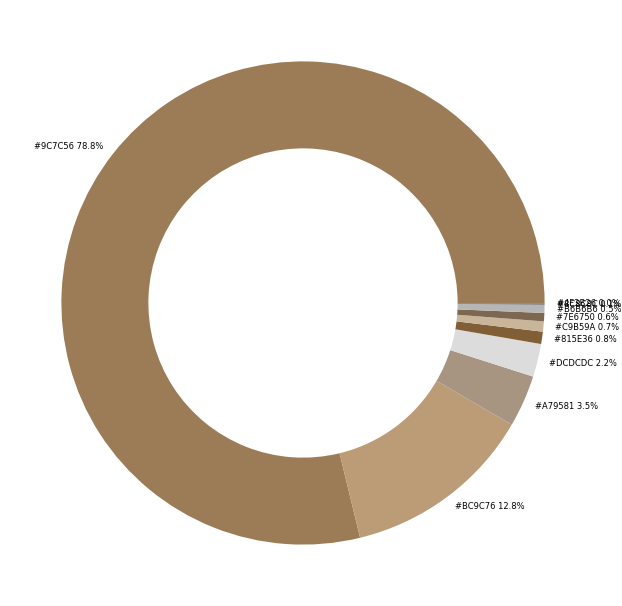

In [11]:

list_color = list(df_color['c_code'])
list_precent = [int(i) for i in list(df_color['occurence'])]
text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color,
                                                                               list_precent)]
fig, ax = plt.subplots(figsize=(80,80),dpi=10)
wedges, text = ax.pie(list_precent,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 60, 'color':'black'}
                     )
plt.setp(wedges, width=0.3)

#create space in the center
plt.setp(wedges, width=0.36)

ax.set_aspect("equal")
fig.set_facecolor('white')
plt.show()

# **Chromotogram Feature Extraction**

In [12]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import extcolors

from colormap import rgb2hex

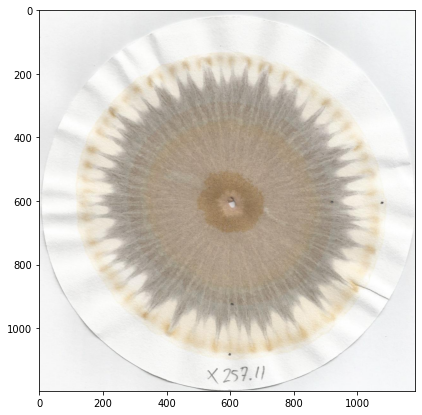

In [13]:
fig, ax = plt.subplots(1, 1, figsize = (10,7))
image_name = '1905026.png'
chromotogram = cv2.imread(image_name)
colour_img = cv2.cvtColor(chromotogram, cv2.COLOR_BGR2RGB)
plt.imshow(colour_img)

In [14]:
%matplotlib inline

chromotogram_mask = cv2.imread(image_name)

print('This image is:', type(chromotogram_mask), 'with dimensions:', chromotogram_mask.shape)

This image is: <class 'numpy.ndarray'> with dimensions: (1198, 1184, 3)


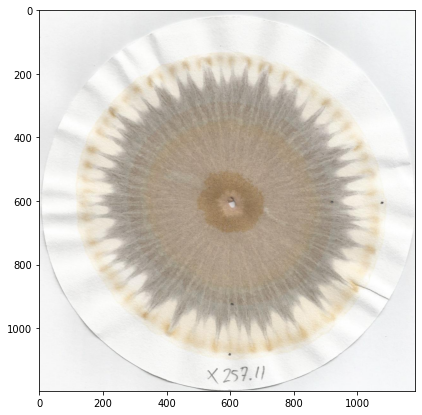

In [15]:
fig, ax = plt.subplots(1, 1, figsize = (10,7))
image_copy = np.copy(chromotogram_mask)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

In [16]:
#Define the color threshold
lower_green = np.array([180,180,200])
upper_green = np.array([255,255,255])

mask = cv2.inRange(image_copy, lower_green, upper_green)

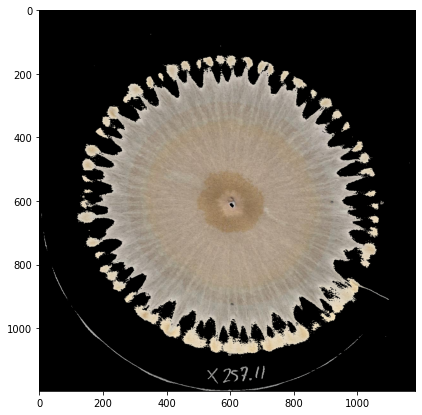

In [17]:
fig, ax = plt.subplots(1, 1, figsize = (10,7))

masked_image = np.copy(image_copy)
masked_image[mask != 0] = [0,0,0]

plt.imshow(masked_image)

In [18]:
image_copy = masked_image

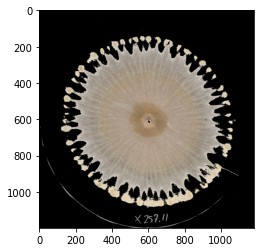

In [19]:
plt.imshow(image_copy)

**Function for Chromotogram feature extraction**

In [20]:
def rvision(image_copy,img_url):
  colors_x = extcolors.extract_from_path(img_url, tolerance = 12, limit = 12)
  maskk = np.array([get_image(image_copy,colors_x[0][i]) for i in range(len(colors_x[0]))])
  return maskk


In [21]:
def get_image(image_copy, color):
    h = color[0][0]
    s = color[0][1]
    v = color[0][2]
    #Define the color threshold
    lower_green = np.array([h-5, s-5, v-5])
    upper_green = np.array([h+5, s+5, v+5])
   
    mask = cv2.inRange(image_copy, lower_green, upper_green)  
    masked_image2 = np.copy(image_copy)
    masked_image2[mask != 0] = [0,0,0]
    return masked_image2


In [22]:
result2 = rvision(image_copy,'1910008.png')

In [23]:
print(result2)

[[[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0

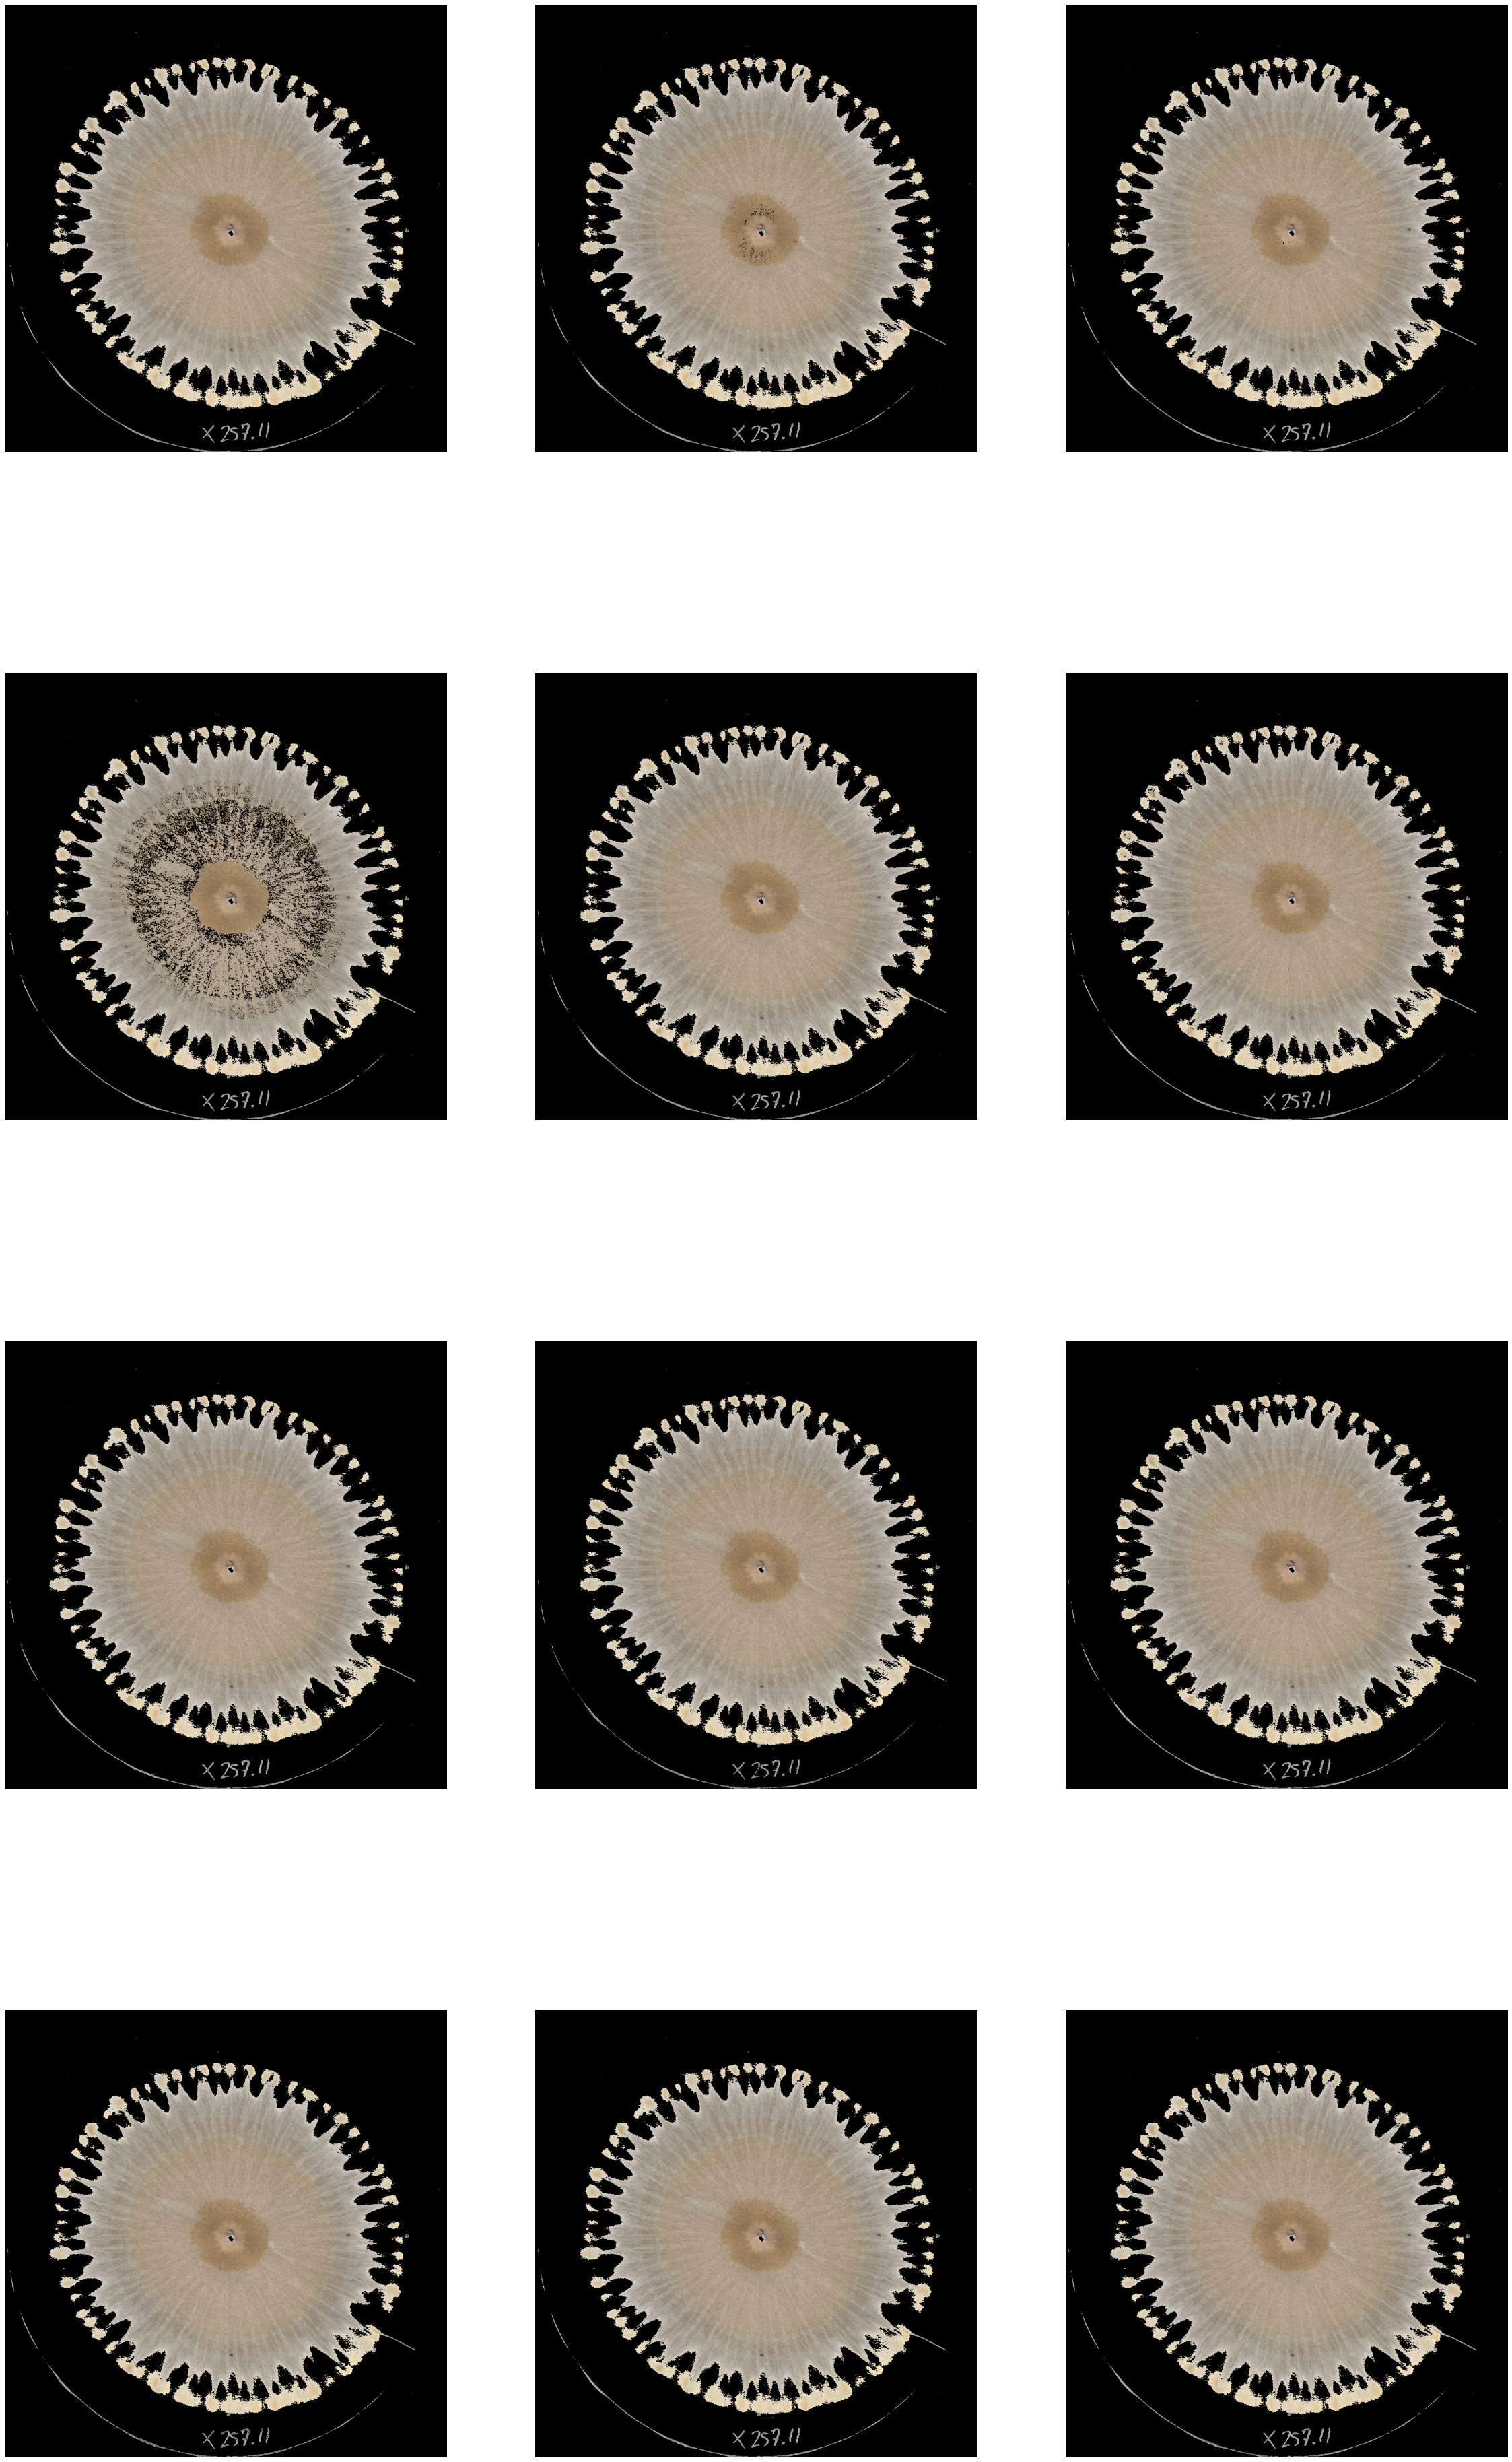

In [24]:
fig = plt.figure(figsize=(40, 70))
rows = 4
columns = 3
  
for i in range(12):
  fig.add_subplot(rows, columns, i+1)
  plt.imshow(result2[i])
  plt.axis('off')

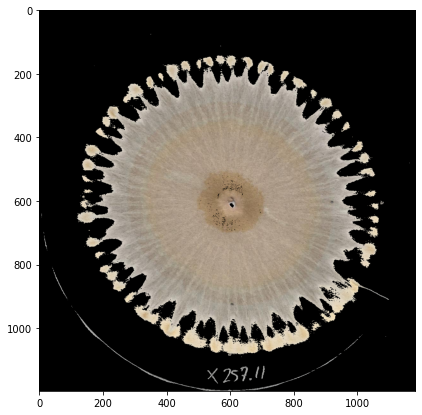

In [25]:
fig, ax = plt.subplots(1, 1, figsize = (10,7))
plt.imshow(result2[1])

In [26]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import extcolors

from colormap import rgb2hex

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  


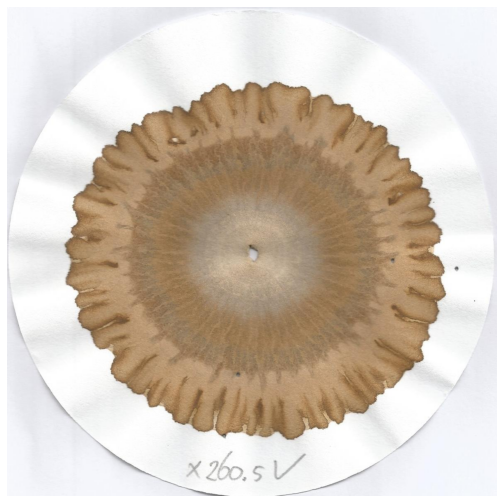

In [27]:
input_name = '1910008.png'
output_width = 900                   #set the output size
img = Image.open(input_name)
wpercent = (output_width/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((output_width,hsize), Image.ANTIALIAS)

#save
resize_name = 'resize_' + input_name  #the resized image name
img.save(resize_name)                 #output location can be specified before resize_name

#read
plt.figure(figsize=(9, 9))
img_url = resize_name
img = plt.imread(img_url)
plt.imshow(img)
plt.axis('off')
plt.show()

In [28]:
colors_x = extcolors.extract_from_path(img_url, tolerance = 12, limit = 12)
colors_x

([((255, 255, 255), 449508),
  ((156, 124, 86), 284001),
  ((188, 156, 118), 46144),
  ((167, 149, 129), 12513),
  ((220, 220, 220), 7961),
  ((129, 94, 54), 2957),
  ((201, 181, 154), 2464),
  ((126, 103, 80), 2001),
  ((182, 182, 182), 1893),
  ((140, 140, 140), 412),
  ((79, 59, 38), 66),
  ((109, 109, 109), 38)],
 810000)

In [29]:
colors_x[0][1][0][0]

156

In [30]:
h = colors_x[0][1][0][0]

s = colors_x[0][1][0][1]

v = colors_x[0][1][0][2]

print(h,s,v)

156 124 86


In [31]:
#Define the color threshold  
lower_green = np.array([h-5, s-5, v-5])

upper_green = np.array([h+5, s+5, v+5])

mask = cv2.inRange(image_copy, lower_green, upper_green)


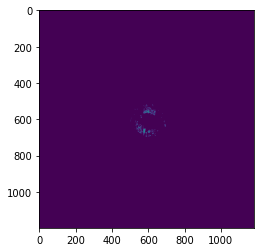

In [32]:
plt.imshow(mask)

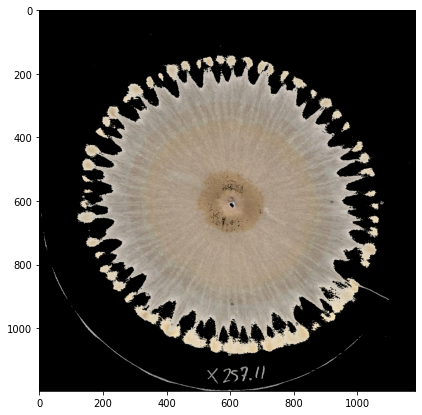

In [33]:
fig, ax = plt.subplots(1, 1, figsize = (10,7))

masked_image2 = np.copy(image_copy)
masked_image2[mask != 0] = [0,0,0]

plt.imshow(masked_image2)

#**Extracting Feature Points**

In [34]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [35]:
cd /content/gdrive/MyDrive/RV_Project/extracted_picsFirst54

/content/gdrive/.shortcut-targets-by-id/1n64G5Yfy2tMmSUsDIxfpds0UVIg0bU3E/RV_Project/extracted_picsFirst54


In [36]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import cv2
import gzip
import copy
import inspect
import math
import random
import itertools
import numpy 

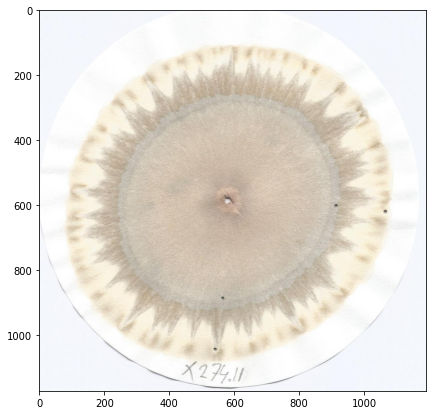

In [37]:
fig, ax = plt.subplots(1, 1, figsize = (10,7))
image_name = '2002020.png'
chromotogram = cv2.imread(image_name)
chromotogram = cv2.cvtColor(chromotogram, cv2.COLOR_BGR2RGB)
plt.imshow(chromotogram)

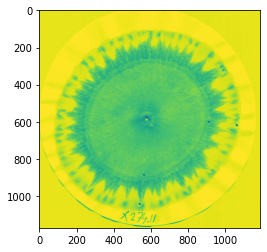

In [38]:
image = cv2.imread(image_name)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)

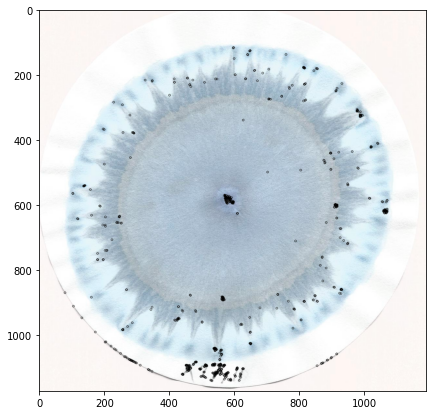

In [39]:
#ORB feature extraction
fig, ax = plt.subplots(1, 1, figsize = (10,7))

orb = cv2.ORB_create(nfeatures=800)
kp, des = orb.detectAndCompute(gray_image, None)
kp_image = cv2.drawKeypoints(image, kp, None, color=(0,0,0), flags=0)

plt.imshow(kp_image)

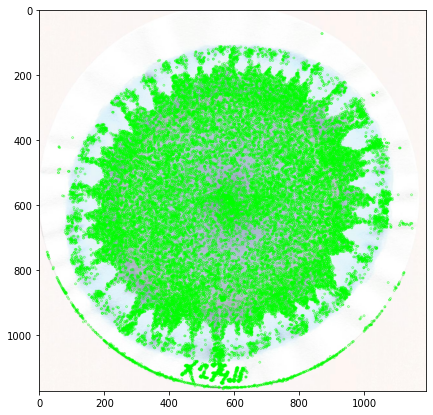

In [40]:
#FAST feature extraction
fig, ax = plt.subplots(1, 1, figsize = (10,7))

fast = cv2.FastFeatureDetector_create()
fast.setNonmaxSuppression(False)

kp = fast.detect(gray_image, None)
kp_image = cv2.drawKeypoints(image, kp, None, color=(0,255,0))

plt.imshow(kp_image)

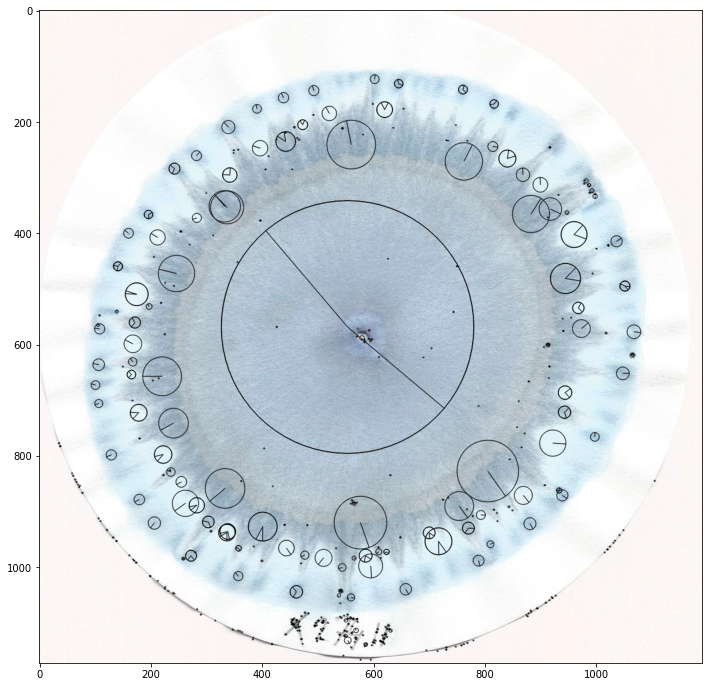

In [41]:
#SIFT corner detection

fig, ax = plt.subplots(1, 1, figsize = (15,12))

sift = cv2.SIFT_create()
kp, des = sift.detectAndCompute(gray_image, None)

kp_image = cv2.drawKeypoints(image, kp, None, color=(0,0,0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(kp_image)

**Extracting Feature Points into a csv**

In [42]:
pts = cv2.KeyPoint_convert(kp)
print(pts)


[[  35.386703  777.0829  ]
 [  37.67276   782.37006 ]
 [  37.67276   782.37006 ]
 [  58.920135  831.1567  ]
 [  60.97012   835.4712  ]
 [  64.56338   842.45026 ]
 [  66.67913   846.73456 ]
 [  69.52527   851.2781  ]
 [  71.52135   855.72516 ]
 [  72.87667   853.3148  ]
 [  77.48926   866.0801  ]
 [  77.48926   866.0801  ]
 [ 101.0678    672.7289  ]
 [ 105.353096  565.10187 ]
 [ 106.49803   912.00146 ]
 [ 106.754486  636.0588  ]
 [ 106.960335  705.82697 ]
 [ 108.31505   547.67303 ]
 [ 108.31505   547.67303 ]
 [ 108.373116  571.78735 ]
 [ 109.925896  916.9068  ]
 [ 121.54582   932.90356 ]
 [ 129.39249   798.0298  ]
 [ 132.72351   946.12366 ]
 [ 138.69482   952.69025 ]
 [ 138.69482   952.69025 ]
 [ 139.09871   540.95276 ]
 [ 141.41568   459.52008 ]
 [ 141.41568   459.52008 ]
 [ 141.41568   459.52008 ]
 [ 150.19922   639.54193 ]
 [ 160.38533   400.26764 ]
 [ 161.76639   978.4762  ]
 [ 165.55739   653.73517 ]
 [ 165.55739   653.73517 ]
 [ 167.36615   700.3535  ]
 [ 167.78506   631.0084  ]
 

In [43]:
import csv

submission = open('resultsjcomp.csv','w')

sub_file = csv.writer(submission)
sub_file.writerow(["x","y"])

for i in range(0, len(pts)):

    sub_file.writerow([ str(pts[i][0]), str(pts[i][1]) ] )

submission.close()

In [44]:
data = pd.read_csv('resultsjcomp.csv')

In [45]:
data

x          y
0      35.386703  777.08290
1      37.672760  782.37006
2      37.672760  782.37006
3      58.920135  831.15670
4      60.970120  835.47120
..           ...        ...
491  1052.069100  494.91125
492  1052.069100  494.91125
493  1065.837000  618.31494
494  1068.191700  576.98280
495  1105.711900  844.64453

[496 rows x 2 columns]

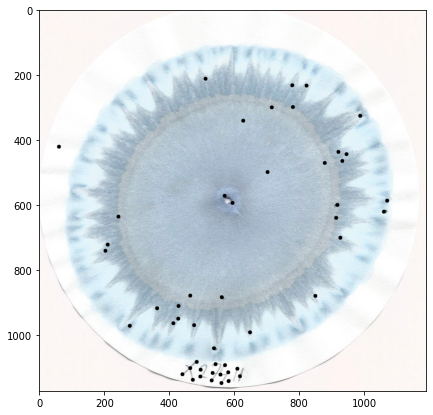

In [46]:
#Shi Tomasi corner detection

fig, ax = plt.subplots(1, 1, figsize = (10,7))

corners = cv2.goodFeaturesToTrack(gray_image, maxCorners=50, qualityLevel=0.02, minDistance=20)
corners = np.float32(corners)

for item in corners:
    x, y = item[0]
    x = int(x)
    y = int(y)
    cv2.circle(image, (x, y), 6, (0, 0, 0), -1)

plt.imshow(image)

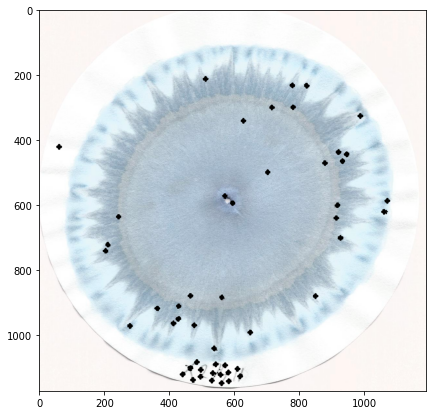

In [47]:
#Harris Corner
fig, ax = plt.subplots(1, 1, figsize = (10,7))

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image = np.float32(gray_image)

dst = cv2.cornerHarris(gray_image, blockSize = 2, ksize = 3, k = 0.04)

dst = cv2.dilate(dst, None)

image[dst > 0.01 * dst.max()] = [0, 0, 0]

plt.imshow(image)